In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('fct_invoice.csv')
df1

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
df2 = pd.read_json('dim_customer.json')
df2

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


# Easy

1. How many unique customers are in the dataset?

In [4]:
print(df1['customer_id'].nunique())

5191


2. What are the different categories of products available? How many unique categories are there?

In [5]:
categories = df1['category'].unique()
print(categories)

num_cat = len(df1['category'].unique())
print(num_cat)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


3. Which payment method is the most popular? How many times was it used?

In [16]:
pay_method = df1.groupby('payment_method').size()
print(pay_method.index[0])
print(pay_method[0])

Cash
44447


# Medium

1. What are the three most popular categories, by total sales?

In [35]:
df1['total'] = df1['price']*df1['quantity']
popu_cat = df1.groupby('category')['total'].sum().sort_values(ascending=False)
print(popu_cat.index[0:3].values)

['Clothing' 'Shoes' 'Technology']


2. What are the total sales attributed to customers over the age of 45?

In [40]:
df1['total'] = df1['price']*df1['quantity']
df = pd.merge(df1, df2, left_on='customer_id', right_on='id')
df[df['age']>45]['total'].sum()

82039768.15

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

Text(0, 0.5, 'Total Sales')

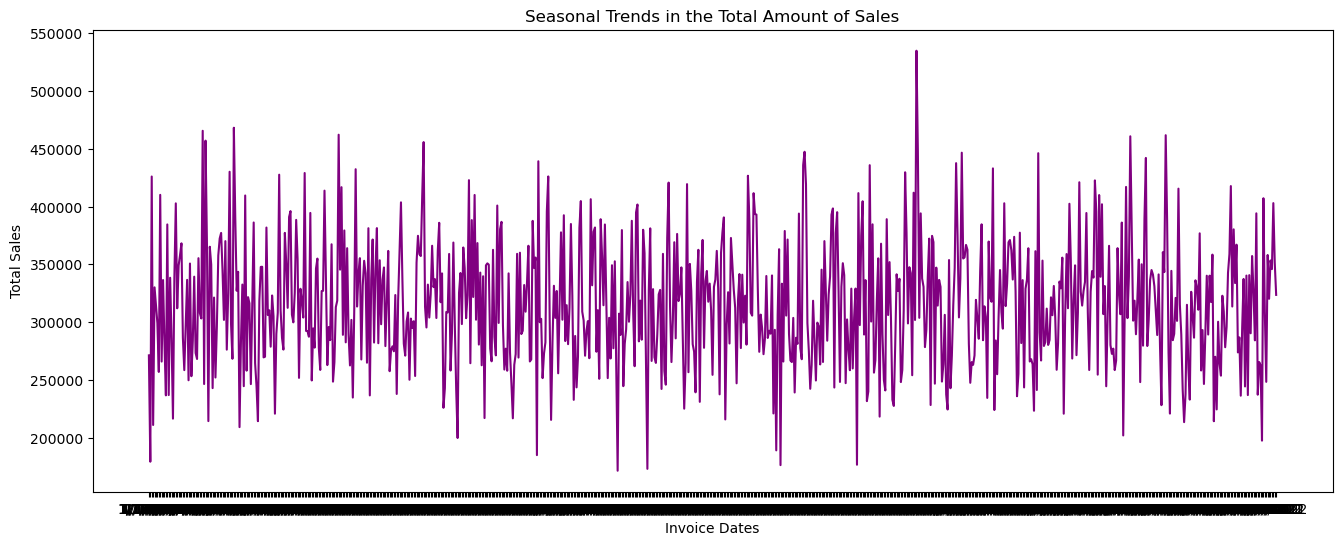

In [46]:
import matplotlib.pyplot as plt

dates_sales = df.groupby('invoice_date')['total'].sum()
invoice_dates = dates_sales.index
total_sales = dates_sales.values

plt.figure(figsize=(16,6))
plt.plot(invoice_dates, total_sales, color='purple')
plt.title('Seasonal Trends in the Total Amount of Sales')
plt.xlabel('Invoice Dates')
plt.ylabel('Total Sales')

# Hard

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [60]:
import numpy as np

bins = [0,9,19,29,39,49,59,69,79,89,99]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
age_range = pd.cut(df['age'],bins=bins,labels=labels,right=True)

df['sales']= df['price']*df['quantity']

pivot_table = pd.pivot_table(df, values='sales',index='category',columns=age_range, aggfunc=np.sum)
print(pivot_table)

age              0-9       10-19        20-29        30-39        40-49  \
category                                                                  
Books            0.0    12801.75     79461.75     84143.10     87203.40   
Clothing         0.0  1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics        0.0   109619.36    605915.32    723544.70    665034.96   
Food & Beverage  0.0    13582.31     73491.96     87246.86     89553.29   
Shoes            0.0   993281.35   5924878.24   7200839.66   7025590.02   
Souvenir         0.0    12375.15     54943.32     64092.72     66391.80   
Technology       0.0  1129800.00   5261550.00   6159300.00   5954550.00   
Toys             0.0    60426.24    385100.80    420582.40    390906.88   

age                    50-59        60-69       70-79       80-89  90-99  
category                                                                  
Books               74962.20     80476.80    54827.85    26664.00    0.0  
Clothing         1032185